In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/high-quality-financial-news-dataset-for-nlp-tasks/LICENSE
/kaggle/input/high-quality-financial-news-dataset-for-nlp-tasks/README.md
/kaggle/input/high-quality-financial-news-dataset-for-nlp-tasks/dataset.csv


In [2]:
data=pd.read_csv("/kaggle/input/high-quality-financial-news-dataset-for-nlp-tasks/dataset.csv")
data.head()

,Date,Subject,Content,ParaphrasedSubject,CompactedSummary,DetailedSummary,Impact
0,3-Mar-24,BAWAN,Bawan Co. announces the board of director’s de...,Bawan Co. Declares Cash Dividends for Second H...,Bawan Co. announces the distribution of cash d...,Bawan Co. has announced its board of directors...,Shareholders who meet the eligibility criteria...
1,3-Mar-24,SABIC AGRI-NUTRIENTS,Addendum Announcement from SABIC Agri-Nutrient...,SABIC Agri-Nutrients Company Extends MoU with ...,SABIC Agri-Nutrients Company and Saudi Agricu...,SABIC Agri-Nutrients Company has announced an...,The extension of the MoU between SABIC Agri-N...
2,3-Mar-24,GAS,Gas Arabian Services Co. Announces Contract Si...,GAS Arabian Services Co. Inks Contract with Sa...,GAS Arabian Services Co. has signed a contrac...,GAS Arabian Services Company has announced the...,This contract marks a significant milestone fo...
3,3-Mar-24,GAS,Gas Arabian Services Co. Announces Contract Si...,GAS Arabian Services Co. Inks Contract with Sa...,GAS Arabian Services Co. has signed a contrac...,GAS Arabian Services Company has announced the...,This contract marks a significant milestone fo...
4,3-Mar-24,ADVANCED,ADVANCED PETROCHEMICAL COMPANY ANNOUNCES THE L...,Advanced Petrochemical Company Resumes Propyle...,Advanced Petrochemical Company has resumed op...,Advanced Petrochemical Company has announced t...,The resumption of operations at Advanced Petro...


# Converting Dateime Format

In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')

In [4]:
data

,Date,Subject,Content,ParaphrasedSubject,CompactedSummary,DetailedSummary,Impact
0,2024-03-03,BAWAN,Bawan Co. announces the board of director’s de...,Bawan Co. Declares Cash Dividends for Second H...,Bawan Co. announces the distribution of cash d...,Bawan Co. has announced its board of directors...,Shareholders who meet the eligibility criteria...
1,2024-03-03,SABIC AGRI-NUTRIENTS,Addendum Announcement from SABIC Agri-Nutrient...,SABIC Agri-Nutrients Company Extends MoU with ...,SABIC Agri-Nutrients Company and Saudi Agricu...,SABIC Agri-Nutrients Company has announced an...,The extension of the MoU between SABIC Agri-N...
2,2024-03-03,GAS,Gas Arabian Services Co. Announces Contract Si...,GAS Arabian Services Co. Inks Contract with Sa...,GAS Arabian Services Co. has signed a contrac...,GAS Arabian Services Company has announced the...,This contract marks a significant milestone fo...
3,2024-03-03,GAS,Gas Arabian Services Co. Announces Contract Si...,GAS Arabian Services Co. Inks Contract with Sa...,GAS Arabian Services Co. has signed a contrac...,GAS Arabian Services Company has announced the...,This contract marks a significant milestone fo...
4,2024-03-03,ADVANCED,ADVANCED PETROCHEMICAL COMPANY ANNOUNCES THE L...,Advanced Petrochemical Company Resumes Propyle...,Advanced Petrochemical Company has resumed op...,Advanced Petrochemical Company has announced t...,The resumption of operations at Advanced Petro...
...,...,...,...,...,...,...,...
1834,2024-06-10,Announcement Regarding Issuance of Disciplinar...,Title: Announcement Regarding Issuance of Disc...,CMA Publishes Disciplinary Board Resolution No...,The Capital Markets Authority (CMA) has annou...,The Capital Markets Authority (CMA) has recen...,This announcement serves as a reminder that r...
1835,2024-06-10,Announcement Regarding Issuance of Disciplinar...,Title: Announcement Regarding Issuance of Disc...,CMA Publishes Disciplinary Board Resolution No...,The Capital Markets Authority (CMA) has annou...,The Capital Markets Authority (CMA) has issue...,This announcement serves as a formal notice t...
1836,2024-06-10,CMA Announcement,Title: CMA Announcement\nDate Publish 10 June ...,CMA Disclaimer on Information Accuracy,Capital Markets Authority (CMA) disclaimer not...,The Capital Markets Authority (CMA) has publis...,This disclaimer underlines the importance of v...
1837,2024-06-10,The UAE SFWG launches the Principles for Susta...,[{'title': 'The UAE SFWG launches the Principl...,UAE SFWG Unveils Sustainability-Related Disclo...,The UAE Sustainable Finance Working Group (SF...,The UAE Sustainable Finance Working Group (SFW...,The introduction of the ‘Principles for Sustai...


# Sentiment Analysis

In [5]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:

sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sid.polarity_scores(text)

data['SentimentScores'] = data['Content'].apply(get_sentiment_scores)

data['Compound'] = data['SentimentScores'].apply(lambda x: x['compound'])
data['Positive'] = data['SentimentScores'].apply(lambda x: x['pos'])
data['Neutral'] = data['SentimentScores'].apply(lambda x: x['neu'])
data['Negative'] = data['SentimentScores'].apply(lambda x: x['neg'])

print(data.head())

        Date               Subject  \
0 2024-03-03                 BAWAN   
1 2024-03-03  SABIC AGRI-NUTRIENTS   
2 2024-03-03                   GAS   
3 2024-03-03                   GAS   
4 2024-03-03              ADVANCED   

                                             Content  \
0  Bawan Co. announces the board of director’s de...   
1  Addendum Announcement from SABIC Agri-Nutrient...   
2  Gas Arabian Services Co. Announces Contract Si...   
3  Gas Arabian Services Co. Announces Contract Si...   
4  ADVANCED PETROCHEMICAL COMPANY ANNOUNCES THE L...   

                                  ParaphrasedSubject  \
0  Bawan Co. Declares Cash Dividends for Second H...   
1  SABIC Agri-Nutrients Company Extends MoU with ...   
2  GAS Arabian Services Co. Inks Contract with Sa...   
3  GAS Arabian Services Co. Inks Contract with Sa...   
4  Advanced Petrochemical Company Resumes Propyle...   

                                    CompactedSummary  \
0  Bawan Co. announces the distribution o

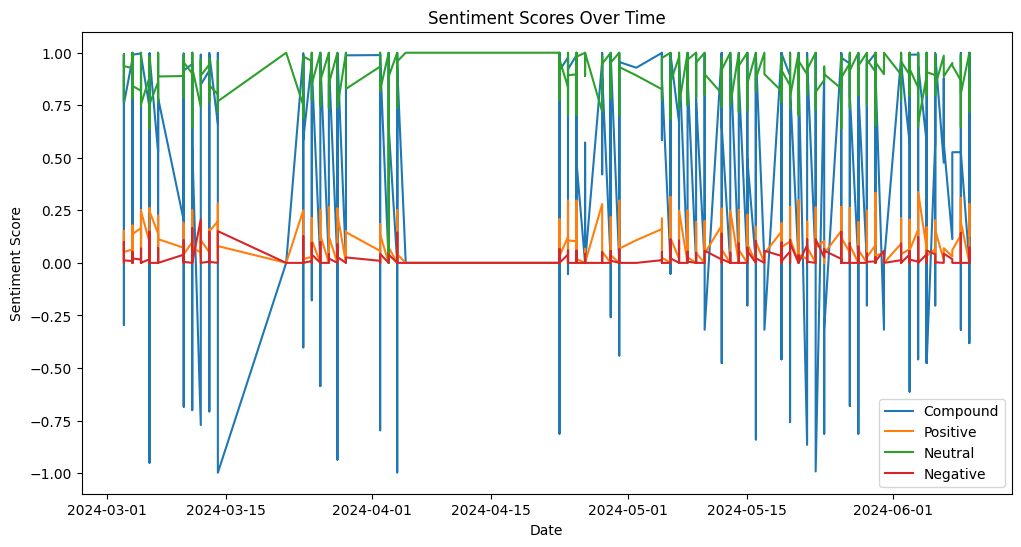

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Compound'], label='Compound')
plt.plot(data['Date'], data['Positive'], label='Positive')
plt.plot(data['Date'], data['Neutral'], label='Neutral')
plt.plot(data['Date'], data['Negative'], label='Negative')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.title('Sentiment Scores Over Time')
plt.show()


# Wordclouds

In [8]:
!pip install wordcloud

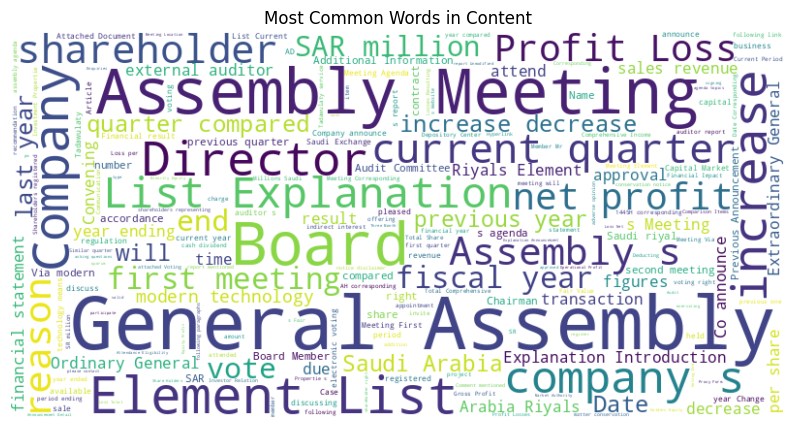

In [9]:
from wordcloud import WordCloud
all_speeches = ' '.join(data['Content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_speeches)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Content')
plt.show()

# NER

In [10]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

data['entities'] = data['Content'].apply(extract_entities)

In [12]:
data['entities'] = data['Content'].apply(extract_entities)

In [13]:
data['entities']

0       [(Bawan Co., ORG), (the second half of the yea...
1       [(Addendum Announcement, PERSON), (SABIC Agri-...
2       [(Gas Arabian Services Co., ORG), (Saudi Power...
3       [(Gas Arabian Services Co., ORG), (Saudi Power...
4       [(ADVANCED PETROCHEMICAL COMPANY, ORG), (27/02...
                              ...                        
1834       [(10 June 2024, DATE), (CMA, ORG), (CMA, ORG)]
1835       [(10 June 2024, DATE), (CMA, ORG), (CMA, ORG)]
1836       [(10 June 2024, DATE), (CMA, ORG), (CMA, ORG)]
1837    [(The UAE SFWG, ORG), (the Year of Sustainabil...
1838                                         [(SCA, ORG)]
Name: entities, Length: 1839, dtype: object

In [14]:
data['entities'][5]# Here 5 represents the 5th entry in dataset

[('Thobe Al-Aseel Regarding Changes', 'PERSON'),
 ('Ownership Percentage', 'PERSON'),
 ('Al-Aseel Company', 'ORG'),
 ('March 2, 2024', 'DATE'),
 ('Faisal Abdullah Al-Jedaie', 'PERSON'),
 ('Board of Directors', 'ORG'),
 ('one', 'CARDINAL'),
 ('2.5%', 'PERCENT'),
 ('Thobe Al- Aseel Company', 'ORG')]

# Impact Analysis

In [15]:
! pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


/tmp/ipykernel_18/1441278781.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ImpactCategory'] = data_cleaned['Impact'].apply(get_sentiment_category)


ImpactCategory
Positive    1666
Neutral       70
Negative      58
Name: count, dtype: int64


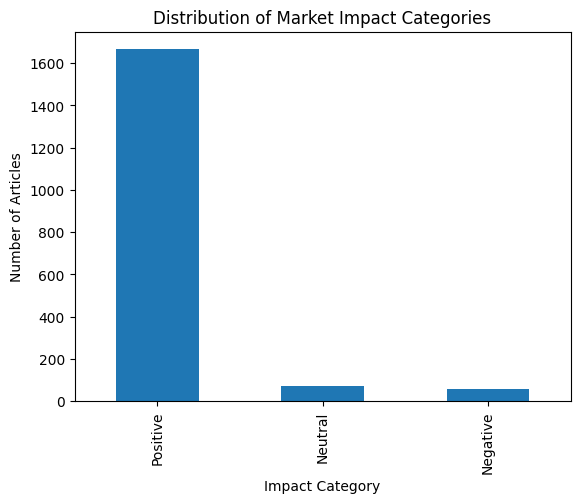

In [16]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
data_cleaned = data.dropna(subset=['Date', 'Impact'])
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment category
def get_sentiment_category(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.08:
        return 'Positive'
    elif sentiment_score <= -0.08:
        return 'Negative'
    else:
        return 'Neutral'
data_cleaned['ImpactCategory'] = data_cleaned['Impact'].apply(get_sentiment_category)
impact_distribution = data_cleaned['ImpactCategory'].value_counts()
print(impact_distribution)

impact_distribution.plot(kind='bar')
plt.title('Distribution of Market Impact Categories')
plt.xlabel('Impact Category')
plt.ylabel('Number of Articles')
plt.show()



/tmp/ipykernel_18/2683598079.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  impact_over_time = data_cleaned.groupby([pd.Grouper(freq='M'), 'ImpactCategory']).size().unstack().fillna(0)


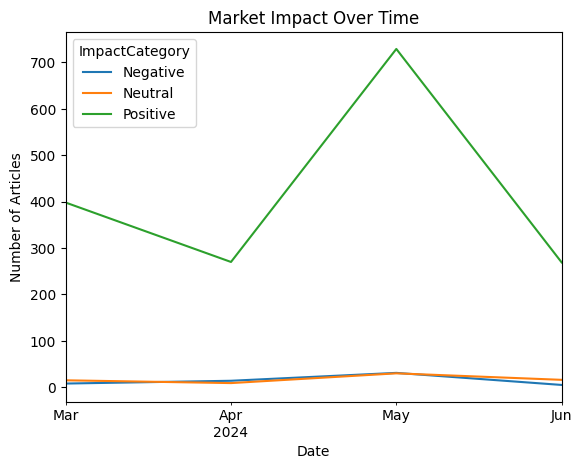

In [17]:
# Temporal analysis of impact categories
data_cleaned.set_index('Date', inplace=True)
impact_over_time = data_cleaned.groupby([pd.Grouper(freq='M'), 'ImpactCategory']).size().unstack().fillna(0)
impact_over_time.plot()
plt.title('Market Impact Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


So most of the articles resulted in positive impact. This can be due to data collection or companies trying to consolidate the quarter with new announcements, in order to meet the goals

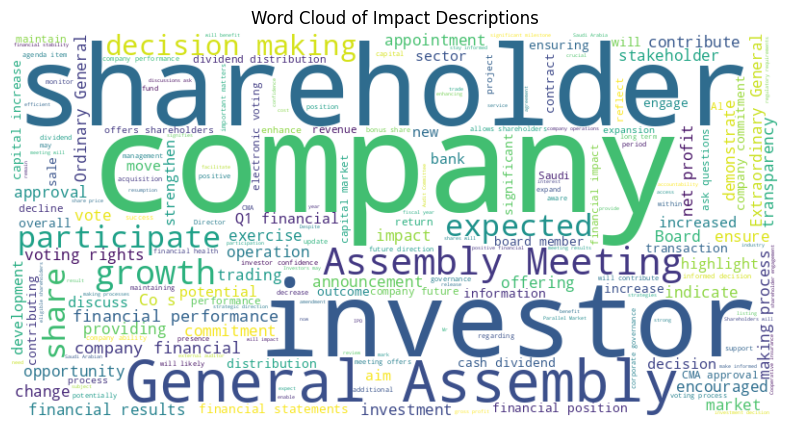

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = ' '.join(data_cleaned['Impact'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Impact Descriptions')
plt.show()

# LDA(LatentDirichletAllocation)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(data_cleaned['Content'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(count_data)

# Display the top words in topic-wise
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index+1}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


Topic #1:
['million', 'decrease', 'net', 'previous', 'compared', 'current', 'profit', 'year', 'increase', 'quarter']


Topic #2:
['list', 'explanation', '1445', 'announces', 'date', 'corresponding', 'announcement', 'saudi', '2024', 'company']


Topic #3:
['end', 'right', 'vote', 'agenda', 'company', 'voting', 'shareholders', 'general', 'assembly', 'meeting']


Topic #4:
['2023', 'year', 'mr', 'al', 'general', 'assembly', 'company', 'directors', 'meeting', 'board']


Topic #5:
['في', 'investors', 'cma', 'company', 'offering', 'shares', 'financial', '2024', 'capital', 'market']




**Assign topics to each document**

In [20]:
topic_assignments = lda.transform(count_data)
data_cleaned['Topic'] = topic_assignments.argmax(axis=1)

topic_labels = {
    0: 'Financial Performance',
    1: 'Company Announcements',
    2: 'Shareholder Meetings',
    3: 'Board Discussions',
    4: 'Capital Markets'
}
data_cleaned['TopicLabel'] = data_cleaned['Topic'].map(topic_labels)

print(data_cleaned[['Content', 'Topic', 'TopicLabel']].head())


                                                      Content  Topic  \
Date                                                                   
2024-03-03  Bawan Co. announces the board of director’s de...      2   
2024-03-03  Addendum Announcement from SABIC Agri-Nutrient...      1   
2024-03-03  Gas Arabian Services Co. Announces Contract Si...      1   
2024-03-03  Gas Arabian Services Co. Announces Contract Si...      1   
2024-03-03  ADVANCED PETROCHEMICAL COMPANY ANNOUNCES THE L...      1   

                       TopicLabel  
Date                               
2024-03-03   Shareholder Meetings  
2024-03-03  Company Announcements  
2024-03-03  Company Announcements  
2024-03-03  Company Announcements  
2024-03-03  Company Announcements  


/tmp/ipykernel_18/3443158191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Topic'] = topic_assignments.argmax(axis=1)
/tmp/ipykernel_18/3443158191.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TopicLabel'] = data_cleaned['Topic'].map(topic_labels)


/tmp/ipykernel_18/1849872282.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  topics_over_time = data_cleaned.groupby([pd.Grouper(freq='M'), 'TopicLabel']).size().unstack().fillna(0)


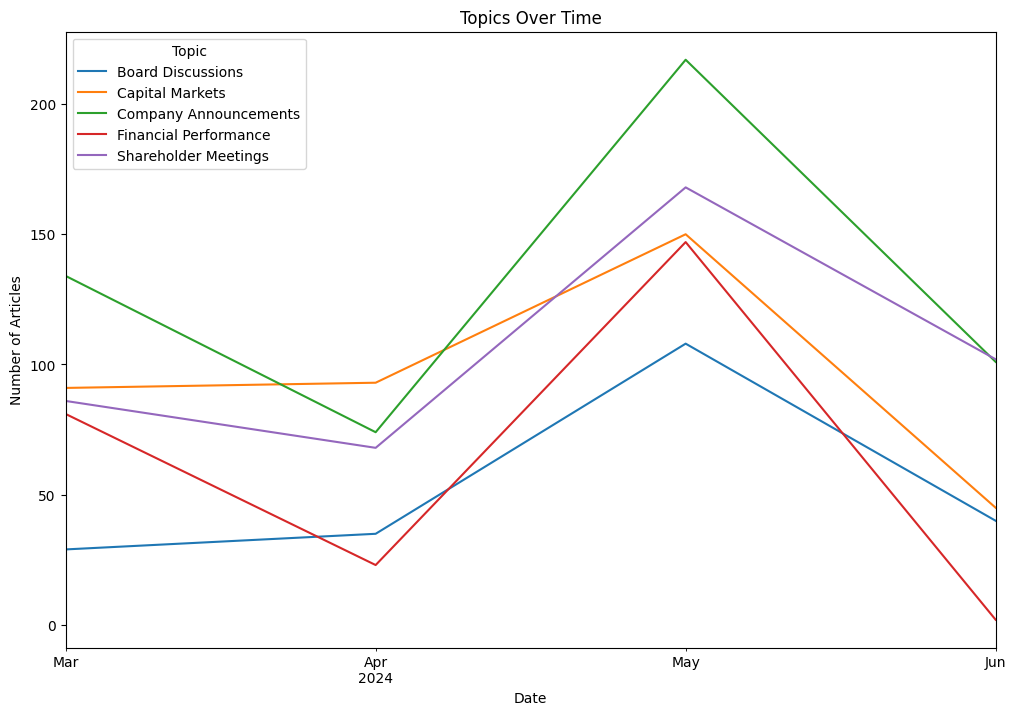

In [21]:
# Plotting the distribution of topics over time
topics_over_time = data_cleaned.groupby([pd.Grouper(freq='M'), 'TopicLabel']).size().unstack().fillna(0)
topics_over_time.plot(figsize=(12, 8))
plt.title('Topics Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(title='Topic')
plt.show()


As we can see most articles were related to Company Anouncements(Green line), while lesser number of articles dealt with Board discussions. The sudden spike in number od articles published in May(if not because of data collection), can be accounted for fillinf of quarterly reports after April.

# Analyzing Similarity

Since the DetailedSummary Coulmn is derived from the content coulmn using Istral, we can also try to analyze how well the model was able to capture the essence of the article. Here I am using a simple Cosine Similarity

In [22]:
data

,Date,Subject,Content,ParaphrasedSubject,CompactedSummary,DetailedSummary,Impact,SentimentScores,Compound,Positive,Neutral,Negative,entities
0,2024-03-03,BAWAN,Bawan Co. announces the board of director’s de...,Bawan Co. Declares Cash Dividends for Second H...,Bawan Co. announces the distribution of cash d...,Bawan Co. has announced its board of directors...,Shareholders who meet the eligibility criteria...,"{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'comp...",0.9587,0.117,0.883,0.000,"[(Bawan Co., ORG), (the second half of the yea..."
1,2024-03-03,SABIC AGRI-NUTRIENTS,Addendum Announcement from SABIC Agri-Nutrient...,SABIC Agri-Nutrients Company Extends MoU with ...,SABIC Agri-Nutrients Company and Saudi Agricu...,SABIC Agri-Nutrients Company has announced an...,The extension of the MoU between SABIC Agri-N...,"{'neg': 0.027, 'neu': 0.858, 'pos': 0.115, 'co...",0.9524,0.115,0.858,0.027,"[(Addendum Announcement, PERSON), (SABIC Agri-..."
2,2024-03-03,GAS,Gas Arabian Services Co. Announces Contract Si...,GAS Arabian Services Co. Inks Contract with Sa...,GAS Arabian Services Co. has signed a contrac...,GAS Arabian Services Company has announced the...,This contract marks a significant milestone fo...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.8271,0.070,0.930,0.000,"[(Gas Arabian Services Co., ORG), (Saudi Power..."
3,2024-03-03,GAS,Gas Arabian Services Co. Announces Contract Si...,GAS Arabian Services Co. Inks Contract with Sa...,GAS Arabian Services Co. has signed a contrac...,GAS Arabian Services Company has announced the...,This contract marks a significant milestone fo...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.8271,0.070,0.930,0.000,"[(Gas Arabian Services Co., ORG), (Saudi Power..."
4,2024-03-03,ADVANCED,ADVANCED PETROCHEMICAL COMPANY ANNOUNCES THE L...,Advanced Petrochemical Company Resumes Propyle...,Advanced Petrochemical Company has resumed op...,Advanced Petrochemical Company has announced t...,The resumption of operations at Advanced Petro...,"{'neg': 0.033, 'neu': 0.865, 'pos': 0.102, 'co...",0.9561,0.102,0.865,0.033,"[(ADVANCED PETROCHEMICAL COMPANY, ORG), (27/02..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,2024-06-10,Announcement Regarding Issuance of Disciplinar...,Title: Announcement Regarding Issuance of Disc...,CMA Publishes Disciplinary Board Resolution No...,The Capital Markets Authority (CMA) has annou...,The Capital Markets Authority (CMA) has recen...,This announcement serves as a reminder that r...,"{'neg': 0.018, 'neu': 0.953, 'pos': 0.03, 'com...",0.1129,0.030,0.953,0.018,"[(10 June 2024, DATE), (CMA, ORG), (CMA, ORG)]"
1835,2024-06-10,Announcement Regarding Issuance of Disciplinar...,Title: Announcement Regarding Issuance of Disc...,CMA Publishes Disciplinary Board Resolution No...,The Capital Markets Authority (CMA) has annou...,The Capital Markets Authority (CMA) has issue...,This announcement serves as a formal notice t...,"{'neg': 0.018, 'neu': 0.953, 'pos': 0.03, 'com...",0.1129,0.030,0.953,0.018,"[(10 June 2024, DATE), (CMA, ORG), (CMA, ORG)]"
1836,2024-06-10,CMA Announcement,Title: CMA Announcement\nDate Publish 10 June ...,CMA Disclaimer on Information Accuracy,Capital Markets Authority (CMA) disclaimer not...,The Capital Markets Authority (CMA) has publis...,This disclaimer underlines the importance of v...,"{'neg': 0.018, 'neu': 0.951, 'pos': 0.031, 'co...",0.1129,0.031,0.951,0.018,"[(10 June 2024, DATE), (CMA, ORG), (CMA, ORG)]"
1837,2024-06-10,The UAE SFWG launches the Principles for Susta...,[{'title': 'The UAE SFWG launches the Principl...,UAE SFWG Unveils Sustainability-Related Disclo...,The UAE Sustainable Finance Working Group (SF...,The UAE Sustainable Finance Working Group (SFW...,The introduction of the ‘Principles for Sustai...,"{'neg': 0.004, 'neu': 0.866, 'pos': 0.13, 'com...",0.9990,0.130,0.866,0.004,"[(The UAE SFWG, ORG), (the Year of Sustainabil..."


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = data.dropna(subset=['Content', 'DetailedSummary'])

content_summary = data['Content'].tolist() + data['DetailedSummary'].tolist()
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(content_summary)

content_tfidf = tfidf_matrix[:len(data)]
summary_tfidf = tfidf_matrix[len(data):]
cosine_similarities = cosine_similarity(content_tfidf, summary_tfidf)

data['CosineSimilarity'] = [cosine_similarities[i, i] for i in range(len(data))]

data[['Content', 'DetailedSummary', 'CosineSimilarity']]


/tmp/ipykernel_18/4216067098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CosineSimilarity'] = [cosine_similarities[i, i] for i in range(len(data))]


,Content,DetailedSummary,CosineSimilarity
0,Bawan Co. announces the board of director’s de...,Bawan Co. has announced its board of directors...,0.748981
1,Addendum Announcement from SABIC Agri-Nutrient...,SABIC Agri-Nutrients Company has announced an...,0.623210
2,Gas Arabian Services Co. Announces Contract Si...,GAS Arabian Services Company has announced the...,0.813945
3,Gas Arabian Services Co. Announces Contract Si...,GAS Arabian Services Company has announced the...,0.821395
4,ADVANCED PETROCHEMICAL COMPANY ANNOUNCES THE L...,Advanced Petrochemical Company has announced t...,0.725735
...,...,...,...
1834,Title: Announcement Regarding Issuance of Disc...,The Capital Markets Authority (CMA) has recen...,0.479611
1835,Title: Announcement Regarding Issuance of Disc...,The Capital Markets Authority (CMA) has issue...,0.630212
1836,Title: CMA Announcement\nDate Publish 10 June ...,The Capital Markets Authority (CMA) has publis...,0.429154
1837,[{'title': 'The UAE SFWG launches the Principl...,The UAE Sustainable Finance Working Group (SFW...,0.703207


In [24]:
import plotly.express as px
fig_cosine = px.histogram(data, x='CosineSimilarity', nbins=50, title='Cosine Similarity Distribution between Content and Detailed Summary')
fig_cosine.show()


So, most summaries showed a similarity of around 0.7-0.8 to the original content, following an almost normal ditribution, if ignore the ones that showed close to zero.

In [25]:
data[['Content', 'DetailedSummary', 'CosineSimilarity']][data['CosineSimilarity']<0.1]

,Content,DetailedSummary,CosineSimilarity
238,[],"SHUAA, a leading asset management and investm...",0.0
239,[],The company NIH has announced the resumption o...,0.0
240,[],Shareholders are reminded that the ex-dividen...,0.0
270,Non-PDF,The Board of Directors (BOD) meeting for ASNIC...,0.0
271,Non-PDF,The Abu Dhabi Securities Exchange (ADX) has a...,0.0
...,...,...,...
1619,Non-PDF,"The Board of Directors (BOD) meeting for NCC, ...",0.0
1659,Non-PDF,Trading of NCC shares is set to resume after t...,0.0
1680,Non-PDF,Dubai Financial Market (DFM) has announced tha...,0.0
1813,Non-PDF,Dubai Financial Market (DFM) has announced tha...,0.0


As we can see the ones with content like "NO PDF" and "Content" are the ones which give 0 score.

# An interactive Widget

In [26]:
from ipywidgets import interact
import ipywidgets as widgets

def display_subject_details(subject):
    filtered_data = data[data['Subject'] == subject]
    if not filtered_data.empty:
        content = filtered_data['Content'].values[0]
        detailed_summary = filtered_data['DetailedSummary'].values[0]
        print(f"Subject: {subject}\n")
        print(f"Content:\n{content}\n")
        print(f"Detailed Summary:\n{detailed_summary}\n")

subject_dropdown = widgets.Dropdown(
    options=data['Subject'].unique(),
    description='Subject:',
    disabled=False,
)

interact(display_subject_details, subject=subject_dropdown)



interactive(children=(Dropdown(description='Subject:', options=('BAWAN', 'SABIC AGRI-NUTRIENTS', 'GAS', 'ADVAN…

<function __main__.display_subject_details(subject)>